In [62]:
import torch
import torch.nn as nn
import torch.autograd as autograd

from modules.pinn_2d import *

import matplotlib.pyplot as plt


In [63]:
def make_tensor(x):
    return torch.tensor(x).unsqueeze(0).T.type(torch.FloatTensor).cuda()

In [64]:
x, y = np.mgrid[-1.0:1.00:0.02, -1.0:1.00:0.02]

In [71]:
fpath = './models/2d_prob1.data'
state_dict = torch.load(fpath)

# Points
# points_x = [(-1.0, 0.0), (0.0, 1.0)]
# points_y = [(-1.0, 1.0), (-1.0, 1.0)]
points_x = [(-1.0, 1.0)]
points_y = [(-1.0, 1.0)]

# Set the number of domains
domain_no = len(points_x)

# Set the global left & right boundary of the calculation domain
global_lb_x = -1.0
global_rb_x = 1.0
global_lb_y = -1.0
global_rb_y = 1.0

# Initialize CPINN model
model = CPINN_2D(domain_no, global_lb_x, global_rb_x, global_lb_y, global_rb_y, figure_path=None)

# to do
model.make_domains(points_x, points_y)
model.make_boundaries()

sample = {'Model{}'.format(i+1): PINN(i) for i in range(domain_no)}

model.module_update(sample)

model.load_state_dict(state_dict)

model = model.cuda()

[]


In [72]:
xy = torch.from_numpy(np.vstack((x.flatten(), y.flatten()))).type(torch.FloatTensor)
pred = model(xy[0].unsqueeze(0).T.cuda(), xy[1].unsqueeze(0).T.cuda())

In [73]:
models = model.get_models()
wheres = model.wheres
model.boundaries

[]

In [74]:
model_1 = models['Model1']
where_1 = wheres[0]
sep_pred = model_1(xy[0].unsqueeze(0).T.cuda(), xy[1].unsqueeze(0).T.cuda()) * where_1(xy[0].unsqueeze(0).T.cuda(), xy[1].unsqueeze(0).T.cuda())

Text(0.5, 1.0, 'u (m) by FEM')

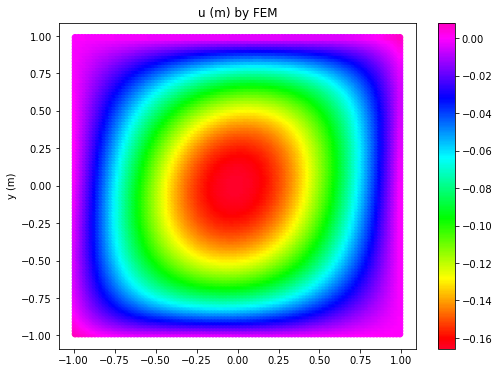

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=sep_pred[:,1].cpu().detach().numpy(), cmap='gist_rainbow')
plt.colorbar()
plt.ylabel("x (m)")
plt.ylabel("y (m)")
plt.title("u (m) by model")
# plt.savefig("./data/2D_plate_1_u_model.png")

Predict by model - X disp.

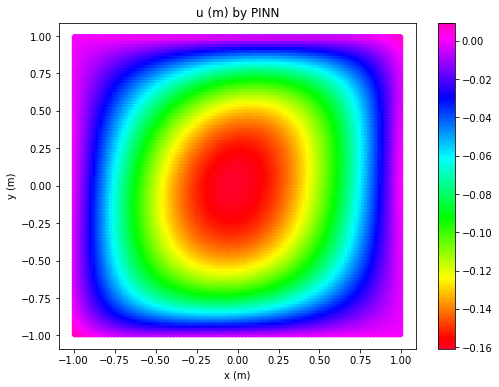

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=pred[:,0].cpu().detach().numpy(), cmap='gist_rainbow')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("u (m) by PINN")
plt.savefig("./figures/2D_prob1_u_model.svg")

Predict by model - Y disp.

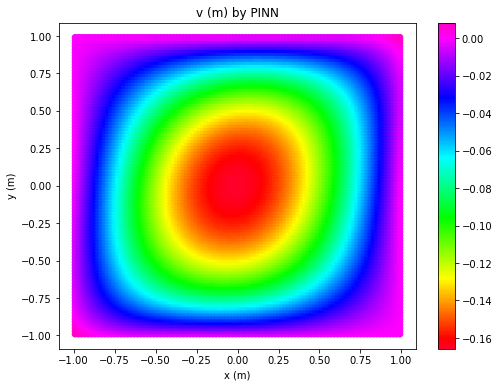

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=pred[:,1].cpu().detach().numpy(), cmap='gist_rainbow')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("v (m) by PINN")
plt.savefig("./figures/2D_prob1_v_model.svg")

FEM Result

In [82]:
fname = "./data/2d_plane_prob1_fem.txt"
data = np.loadtxt(fname=fname)

x, y, u, v = data.T

Predict by FEM - X disp.

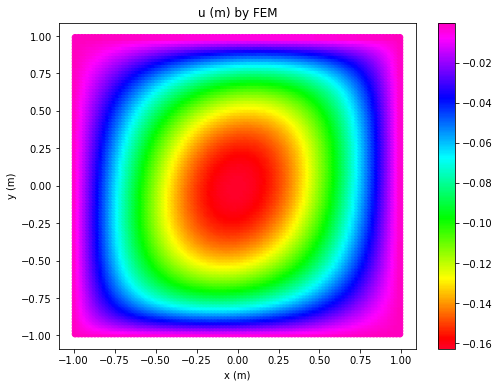

In [87]:
plt.figure(figsize=(8, 6))

plt.scatter(x, y, c=u, cmap='gist_rainbow')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("u (m) by FEM")

plt.savefig("./figures/2D_prob1_u_fem.svg")

Predict by FEM - Y disp.

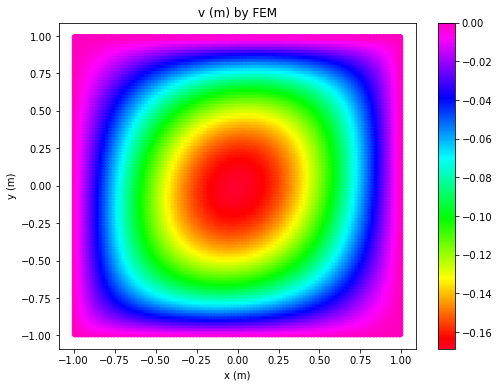

In [88]:
plt.figure(figsize=(8, 6))

plt.scatter(x, y, c=v, cmap='gist_rainbow')
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("v (m) by FEM")
plt.savefig("./figures/2D_prob1_v_fem.svg")